In [13]:
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PREPROCESSING

In [8]:
from stop_word import stop_words
import nltk
from nltk.stem import PorterStemmer
import re
nltk.download('punkt') # Download data yang dibutuhkan untuk NLTK (jalankan sekali pada setiap instalasi)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df = pd.read_csv("./dataset/dataset.csv") # Memuat dataset

In [18]:
df = df.sample(n=2000, random_state=42)  # random_state digunakan untuk reproduksi hasil

In [19]:
df

,URLs,Headline,Body,Label
2580,https://www.reuters.com/article/us-mediaset-vi...,Mediaset and Vivendi in contact over pay-TV di...,FILE PHOTO: A woman walks walk past the main e...,1
3660,http://www.bbc.com/news/world-asia-41521260\r\n,Nobel prize: Chronicle of wound-up 'Harukists'...,Image copyright AFP/Getty Images Image caption...,1
897,http://www.cnn.com/2017/10/05/world/gallery/we...,The week in 35 photos,US Secretary of State Rex Tillerson makes a st...,1
2091,http://beforeitsnews.com/sports/2017/09/florid...,Florida State’s season is in a heap of trouble.,Florida State’s season is in a heap of trouble...,0
1044,http://beforeitsnews.com/u-s-politics/2017/09/...,America Needs a New News Source,America Needs a New News Source\n(Before It's ...,0
...,...,...,...,...
3497,https://www.reuters.com/article/us-britain-eu-...,"Wait for the talks, says UK PM's spokesman on ...",LONDON (Reuters) - A speech in Italy by Prime ...,1
1706,http://beforeitsnews.com/u-s-politics/2017/10/...,ICE Rounds Up Nearly 500 Illegal Aliens Primar...,ICE Rounds Up Nearly 500 Illegal Aliens Primar...,0
2462,https://www.nytimes.com/2017/10/12/arts/rose-m...,Rose McGowan’s Twitter Account Locked After Po...,"By midmorning on Thursday, as the Twitter univ...",1
1299,http://dailybuzzlive.com/vegas-shooter-filmed-...,"Vegas Shooter Filmed Himself During Slaughter,...",Warning: Graphic Content Below\n \nMillionaire...,0


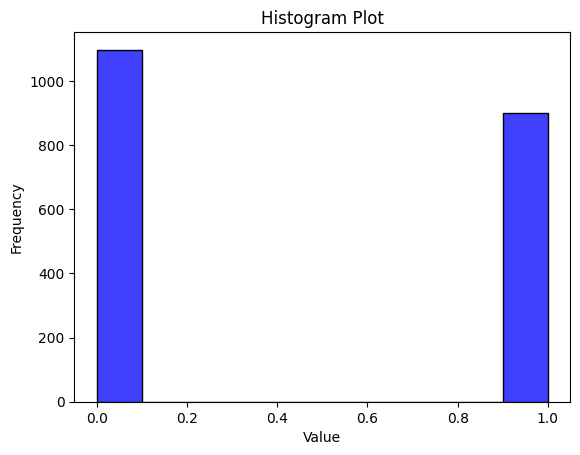

In [20]:
# Membuat histogram plot menggunakan Seaborn
sns.histplot(df['Label'], bins=10, kde=False, color='blue')
plt.title('Histogram Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [21]:
df

,URLs,Headline,Body,Label
2580,https://www.reuters.com/article/us-mediaset-vi...,Mediaset and Vivendi in contact over pay-TV di...,FILE PHOTO: A woman walks walk past the main e...,1
3660,http://www.bbc.com/news/world-asia-41521260\r\n,Nobel prize: Chronicle of wound-up 'Harukists'...,Image copyright AFP/Getty Images Image caption...,1
897,http://www.cnn.com/2017/10/05/world/gallery/we...,The week in 35 photos,US Secretary of State Rex Tillerson makes a st...,1
2091,http://beforeitsnews.com/sports/2017/09/florid...,Florida State’s season is in a heap of trouble.,Florida State’s season is in a heap of trouble...,0
1044,http://beforeitsnews.com/u-s-politics/2017/09/...,America Needs a New News Source,America Needs a New News Source\n(Before It's ...,0
...,...,...,...,...
3497,https://www.reuters.com/article/us-britain-eu-...,"Wait for the talks, says UK PM's spokesman on ...",LONDON (Reuters) - A speech in Italy by Prime ...,1
1706,http://beforeitsnews.com/u-s-politics/2017/10/...,ICE Rounds Up Nearly 500 Illegal Aliens Primar...,ICE Rounds Up Nearly 500 Illegal Aliens Primar...,0
2462,https://www.nytimes.com/2017/10/12/arts/rose-m...,Rose McGowan’s Twitter Account Locked After Po...,"By midmorning on Thursday, as the Twitter univ...",1
1299,http://dailybuzzlive.com/vegas-shooter-filmed-...,"Vegas Shooter Filmed Himself During Slaughter,...",Warning: Graphic Content Below\n \nMillionaire...,0


In [22]:
df.dropna(inplace=True) # Drop semua dataset bernilai NaN

In [24]:
df['Full'] = df['Headline']+ ' ' + df['Body'] # Membuat kolom baru full terdiri dari gabungan kolom headline dan body

In [25]:
df['Full']
df.dropna(inplace=True) # Drop semua dataset bernilai NaN

In [74]:
df.to_csv("./dataset/train_dataset.csv",index=False)

#### PREPROCESSING FUNCTION

In [26]:
def stemming(word):
    stemmer = PorterStemmer()
    stemmed_word = stemmer.stem(word)
    return stemmed_word

In [27]:
def stopword_removal_and_filtering(words):
    # Menghilangkan stopwords dan Case Folding
    filtered_words = [word for word in words if word.lower() not in stop_words] 

    # Filtering singkatan sederhana
    filtered_words = [re.sub(r'\.', '', word) for word in filtered_words]

    # Filtering angka
    filtered_words = [re.sub(r'\d', '', word) for word in filtered_words]
    
    # Filtering data redundan
    filtered_words = set(filtered_words)
    
    return filtered_words

In [28]:
def preprocessing(text):
    # Menghilangkan tanda baca
    text = re.sub(r'[^\w\s-]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Memisahkan teks menjadi kata-kata (Tokenizing)
    words = text.split()
    
    # Stop word removal dan stemming
    filtered_words = stopword_removal_and_filtering(words)

    # Stemming
    filtered_words = [stemming(i) for i in filtered_words]

    # Menghilangkan spasi ekstra
    processed_text = ' '.join(filtered_words)

    return processed_text


In [29]:
X_dataset_fullset = df['Full'].apply(preprocessing) # Proses preprocessing dataset

In [30]:
X_dataset_fullset

2580     group walk premium stake hold partnership ita...
3660     write copyright loss fail joke japan heavili ...
897      job foreign-polici wednesday plan deni report...
2091     acc wake freshman loss goal account throw tim...
1044    news  kati loss gillespi rush reader molyneux ...
                              ...                        
3497     michael provid prime prime itali sourc jame c...
1706     counti illeg act york prison boston detain cu...
2462     intent confidenti number actress write violat...
1299     counti ban fat fulli number claim pump modifi...
132      south china number closest energi research bo...
Name: Full, Length: 1989, dtype: object

In [31]:
X_dataset_fullset = X_dataset_fullset.values.flatten() # Menggabungkan data menjadi 1 dimensi

In [32]:
X_dataset_fullset

array([' group walk premium stake hold partnership italian compani decemb mediaset extend file su canal price telecom agreement loggerhead photo side paper - sourc banca walk offer develop share french hostil percent pa share headquart april woman akro berlusconi entranc viv note saturday bitter reach main backtrack entertainment-to-telecom dec mi broader file joint-ventur broadcast repres fuent rift negoti long-term conglomer plan solut own januari media session gonzalo compani silvio talk line buy euro difficult sign daili pari deep unit sole ahead schedul deepen arm milan-bas potenti famili year disput creation billion commun prime contact franc pay-tv ore minist built lawyer vivendi sharpli court reuter hear announc matter posit wider broker close downsiz open monday damag milan reuter legal rose industri deal tlit vivendi-telecom involv italia end photo',
       ' write copyright loss fail joke japan heavili wintrsoldierh streamer editor playback bookshop rush spotlight joke hand 

In [49]:
X_dataset_fullset = X_dataset_fullset.tolist() # Mengubah data menjadi list

AttributeError: 'list' object has no attribute 'tolist'

In [50]:
X_dataset_fullset

[' group walk premium stake hold partnership italian compani decemb mediaset extend file su canal price telecom agreement loggerhead photo side paper - sourc banca walk offer develop share french hostil percent pa share headquart april woman akro berlusconi entranc viv note saturday bitter reach main backtrack entertainment-to-telecom dec mi broader file joint-ventur broadcast repres fuent rift negoti long-term conglomer plan solut own januari media session gonzalo compani silvio talk line buy euro difficult sign daili pari deep unit sole ahead schedul deepen arm milan-bas potenti famili year disput creation billion commun prime contact franc pay-tv ore minist built lawyer vivendi sharpli court reuter hear announc matter posit wider broker close downsiz open monday damag milan reuter legal rose industri deal tlit vivendi-telecom involv italia end photo',
 ' write copyright loss fail joke japan heavili wintrsoldierh streamer editor playback bookshop rush spotlight joke hand bestsel repo

In [51]:
X_string_fullset = ','.join(X_dataset_fullset) # Menggabung data menjadi sebuah string

In [52]:
X_feature_fullset = set(X_string_fullset.split(" ")) # Memisahkan string menjadi fitur - fitur
X_feature_fullset = list(X_feature_fullset)

In [53]:
X_feature_fullset = pd.Series(data=X_feature_fullset,name="Feature") # Mengubah list menjadi data series 

In [54]:
X_feature_fullset.dropna(inplace=True)

In [55]:
X_feature_fullset.drop(index=0,inplace=True)

In [56]:
X_feature_fullset.to_csv("./dataset/unique_words.csv")

## PERHITUNGAN BOBOT FITUR (TF-IDF)

In [57]:
import math
import numpy as np
import pandas as pd

In [58]:
docs = X_dataset_fullset
processed_unique_words = pd.read_csv("./dataset/unique_words.csv",index_col=0)

In [59]:
processed_unique_words

,Feature
1,abruptli
2,fluent
3,feng
4,"alleg,news"
5,pga
...,...
27223,stpr
27224,lithuania
27225,viana
27226,discours


In [60]:
processed_unique_words = processed_unique_words['Feature'].to_list()

In [68]:
processed_unique_words = [str(i) for i in processed_unique_words]

In [69]:
tf = np.zeros((len(processed_unique_words), len(docs)))

In [70]:
docs

[' group walk premium stake hold partnership italian compani decemb mediaset extend file su canal price telecom agreement loggerhead photo side paper - sourc banca walk offer develop share french hostil percent pa share headquart april woman akro berlusconi entranc viv note saturday bitter reach main backtrack entertainment-to-telecom dec mi broader file joint-ventur broadcast repres fuent rift negoti long-term conglomer plan solut own januari media session gonzalo compani silvio talk line buy euro difficult sign daili pari deep unit sole ahead schedul deepen arm milan-bas potenti famili year disput creation billion commun prime contact franc pay-tv ore minist built lawyer vivendi sharpli court reuter hear announc matter posit wider broker close downsiz open monday damag milan reuter legal rose industri deal tlit vivendi-telecom involv italia end photo',
 ' write copyright loss fail joke japan heavili wintrsoldierh streamer editor playback bookshop rush spotlight joke hand bestsel repo

### Menghitung Term Frequency

In [71]:
for i in range(len(docs)):
    for x in range(len(processed_unique_words)):
        count = docs[i].count(processed_unique_words[x])
        tf[x][i] = 0 if count == 0 else 1 + math.log(1 + count)

In [72]:
df_tf = pd.DataFrame(tf)

In [73]:
df_tf.to_csv('./dataset/tf.csv',index=False) # Menyimpan hasil perhitungan term frequency

## Data Preparation (START RUNNING DARI SINI)

### Load Feature

In [75]:
df = pd.read_csv("./dataset/train_dataset.csv") # Memuat dataset
df.dropna(inplace=True) # Drop semua dataset bernilai NaN

In [76]:
unique_word = pd.read_csv("./dataset/unique_words.csv",index_col=0)
unique_word = unique_word['Feature'].tolist()

In [81]:
unique_word = [str(i) for i in unique_word]

In [82]:
tfdf = pd.read_csv("./dataset/tf.csv")
tfdf.index = unique_word
tfdf = tfdf.transpose()

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(tfdf, df['Label'], test_size=0.10, random_state=42) # Data Splitting

display(X_train,y_test)

,abruptli,fluent,feng,"alleg,news",pga,ijalana,caress,engmark,iot,donohu,...,spip,knew,mi-,pop-culture-consci,clemen,stpr,lithuania,viana,discours,ncbknn
306,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.693147,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,1.693147,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1173    0
1650    0
843     1
70      0
755     0
       ..
1293    0
1557    0
281     1
939     1
859     1
Name: Label, Length: 199, dtype: int64

In [85]:
# Normalisasi Data
norm_X_train = scaler.fit_transform(X_train)
norm_X_test = scaler.fit_transform(X_test)

## Create Model

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

### Arsitektur 1

In [11]:
model = Sequential()

model.add(Dense(512, input_shape=(norm_X_train.shape[1],), activation='relu'))

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification (fake or not)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(norm_X_train, y_train, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 2s 140ms/step - loss: 0.5942 - accuracy: 0.7099 - val_loss: 0.3395 - val_accuracy: 0.9162
Epoch 2/50
7/7 [==============================] - 1s 114ms/step - loss: 0.2077 - accuracy: 0.9391 - val_loss: 0.1458 - val_accuracy: 0.9665
Epoch 3/50
7/7 [==============================] - 1s 116ms/step - loss: 0.0550 - accuracy: 0.9870 - val_loss: 0.1573 - val_accuracy: 0.9721
Epoch 4/50
7/7 [==============================] - 1s 114ms/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.2068 - val_accuracy: 0.9665
Epoch 5/50
7/7 [==============================] - 1s 116ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.2740 - val_accuracy: 0.9609
Epoch 6/50
7/7 [==============================] - 1s 120ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3157 - val_accuracy: 0.9609
Epoch 7/50
7/7 [==============================] - 1s 121ms/step - loss: 9.5808e-04 - accuracy: 1.0000 - val_loss: 0.3291 - val_accuracy: 0.9609
Epoch 8/50
7/7 [

In [12]:
loss, accuracy = model.evaluate(norm_X_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.4919 - accuracy: 0.9497


### Arsitektur 2

In [87]:
model = Sequential()

# Input layer
model.add(Dense(512, input_shape=(norm_X_train.shape[1],), activation='relu'))
model.add(Dropout(0.6))

# Hidden layers
model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))

# Additional hidden layer
model.add(Dense(64, activation='relu'))


# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(norm_X_train, y_train, epochs=100, batch_size=256, validation_split=0.1)

Epoch 1/100
7/7 [==============================] - 2s 170ms/step - loss: 0.6397 - accuracy: 0.6207 - val_loss: 0.4496 - val_accuracy: 0.8659
Epoch 2/100
7/7 [==============================] - 1s 124ms/step - loss: 0.3638 - accuracy: 0.8808 - val_loss: 0.2539 - val_accuracy: 0.9330
Epoch 3/100
7/7 [==============================] - 1s 126ms/step - loss: 0.1538 - accuracy: 0.9547 - val_loss: 0.3022 - val_accuracy: 0.9441
Epoch 4/100
7/7 [==============================] - 1s 123ms/step - loss: 0.0563 - accuracy: 0.9839 - val_loss: 0.2082 - val_accuracy: 0.9497
Epoch 5/100
7/7 [==============================] - 1s 123ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.2653 - val_accuracy: 0.9553
Epoch 6/100
7/7 [==============================] - 1s 126ms/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.2751 - val_accuracy: 0.9609
Epoch 7/100
7/7 [==============================] - 1s 124ms/step - loss: 0.0147 - accuracy: 0.9975 - val_loss: 0.3478 - val_accuracy: 0.9609
Epoch 8/100
7

In [14]:
loss, accuracy = model.evaluate(norm_X_test, y_test)

7/7 [==============================] - 0s 13ms/step - loss: 0.2340 - accuracy: 0.9648


### Arsitektur 3

In [141]:
model = Sequential()

model.add(Dense(512, input_shape=(norm_X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Additional hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(norm_X_train, y_train, epochs=100, batch_size=256, validation_split=0.1)

Epoch 1/100
7/7 [==============================] - 2s 141ms/step - loss: 0.7083 - accuracy: 0.5137 - val_loss: 0.6813 - val_accuracy: 0.6872
Epoch 2/100
7/7 [==============================] - 1s 114ms/step - loss: 0.7140 - accuracy: 0.5366 - val_loss: 0.6805 - val_accuracy: 0.7821
Epoch 3/100
7/7 [==============================] - 1s 115ms/step - loss: 0.6989 - accuracy: 0.5596 - val_loss: 0.6706 - val_accuracy: 0.8101
Epoch 4/100
7/7 [==============================] - 1s 117ms/step - loss: 0.6830 - accuracy: 0.5839 - val_loss: 0.6572 - val_accuracy: 0.8212
Epoch 5/100
7/7 [==============================] - 1s 119ms/step - loss: 0.6452 - accuracy: 0.6273 - val_loss: 0.6215 - val_accuracy: 0.7933
Epoch 6/100
7/7 [==============================] - 1s 124ms/step - loss: 0.6258 - accuracy: 0.6733 - val_loss: 0.5746 - val_accuracy: 0.8324
Epoch 7/100
7/7 [==============================] - 1s 119ms/step - loss: 0.5740 - accuracy: 0.7360 - val_loss: 0.4980 - val_accuracy: 0.9050
Epoch 8/100
7

In [143]:
loss, accuracy = model.evaluate(norm_X_test, y_test)

7/7 [==============================] - 0s 14ms/step - loss: 0.3660 - accuracy: 0.9648


### ARSITEKTUR 4

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# model = Sequential()

# # Embedding layer
# model.add(Embedding(input_dim=2000, output_dim=128, input_length=norm_X_train.shape[1],))

# # LSTM layer
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(32))

# # Dense layers
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(norm_X_train, y_train, epochs=100, batch_size=256, validation_split=0.1)

### Arsitektur 5

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()

# Input layer
model.add(Dense(512, input_shape=(norm_X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(norm_X_train, y_train, epochs=100, batch_size=256, validation_split=0.1)

Epoch 1/100
7/7 [==============================] - 2s 146ms/step - loss: 0.8300 - accuracy: 0.5863 - val_loss: 0.6680 - val_accuracy: 0.5419
Epoch 2/100
7/7 [==============================] - 1s 120ms/step - loss: 0.6553 - accuracy: 0.6683 - val_loss: 0.6458 - val_accuracy: 0.6536
Epoch 3/100
7/7 [==============================] - 1s 116ms/step - loss: 0.5684 - accuracy: 0.7373 - val_loss: 0.6261 - val_accuracy: 0.6983
Epoch 4/100
7/7 [==============================] - 1s 120ms/step - loss: 0.4463 - accuracy: 0.7988 - val_loss: 0.4841 - val_accuracy: 0.8492
Epoch 5/100
7/7 [==============================] - 1s 118ms/step - loss: 0.3039 - accuracy: 0.8807 - val_loss: 0.3666 - val_accuracy: 0.9553
Epoch 6/100
7/7 [==============================] - 1s 122ms/step - loss: 0.2196 - accuracy: 0.9137 - val_loss: 0.3086 - val_accuracy: 0.9330
Epoch 7/100
7/7 [==============================] - 1s 116ms/step - loss: 0.1648 - accuracy: 0.9422 - val_loss: 0.2422 - val_accuracy: 0.9609
Epoch 8/100
7

In [144]:
loss, accuracy = model.evaluate(norm_X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.3660 - accuracy: 0.9648


### Arsitektur 6

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

model = Sequential()

# Input layer
model.add(Dense(1024, input_shape=(norm_X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Hidden layers
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(norm_X_train, y_train, epochs=100, batch_size=256, validation_split=0.1)

Epoch 1/100
7/7 [==============================] - 4s 236ms/step - loss: 0.8297 - accuracy: 0.5957 - val_loss: 0.7522 - val_accuracy: 0.4078
Epoch 2/100
7/7 [==============================] - 2s 221ms/step - loss: 0.5733 - accuracy: 0.7366 - val_loss: 0.6515 - val_accuracy: 0.6536
Epoch 3/100
7/7 [==============================] - 2s 221ms/step - loss: 0.3770 - accuracy: 0.8348 - val_loss: 0.4744 - val_accuracy: 0.7933
Epoch 4/100
7/7 [==============================] - 2s 219ms/step - loss: 0.2330 - accuracy: 0.9112 - val_loss: 0.3538 - val_accuracy: 0.8827
Epoch 5/100
7/7 [==============================] - 2s 222ms/step - loss: 0.1311 - accuracy: 0.9571 - val_loss: 0.1813 - val_accuracy: 0.9721
Epoch 6/100
7/7 [==============================] - 2s 224ms/step - loss: 0.0810 - accuracy: 0.9770 - val_loss: 0.1347 - val_accuracy: 0.9721
Epoch 7/100
7/7 [==============================] - 2s 223ms/step - loss: 0.0487 - accuracy: 0.9894 - val_loss: 0.1127 - val_accuracy: 0.9777
Epoch 8/100
7

In [ ]:
history = model.fit(norm_X_train, y_train, epochs=100, batch_size=256, validation_split=0.1)

In [73]:
loss, accuracy = model.evaluate(norm_X_test, y_test)

7/7 [==============================] - 0s 12ms/step - loss: 0.1046 - accuracy: 0.9698


In [ ]:
model.save("my_model.h5")

### Model Jurnal Referensi

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2,
                                       min_samples_leaf=1, max_features=None, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini',  random_state=42)
svm_model = SVC(C=1.0, kernel='poly', degree=1, coef0=1.0, gamma=1.0)
gradient_boosted_trees = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
decision_tree.fit(norm_X_train, y_train)
random_forest.fit(norm_X_train, y_train)
svm_model.fit(norm_X_train, y_train)
gradient_boosted_trees.fit(norm_X_train, y_train)

In [ ]:
# Prediksi menggunakan data uji
decision_tree_pred = decision_tree.predict(norm_X_test)
random_forest_pred = random_forest.predict(norm_X_test)
svm_pred = svm_model.predict(norm_X_test)
gradient_boosted_trees_pred = gradient_boosted_trees.predict(norm_X_test)

In [ ]:
# Menghitung akurasi untuk masing-masing model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
gradient_boosted_trees_accuracy = accuracy_score(y_test, gradient_boosted_trees_pred)

# Menampilkan hasil akurasi
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Gradient Boosted Trees Accuracy:", gradient_boosted_trees_accuracy)

### Model Testing

In [97]:
tfdf.columns

Index([               (0, nan),           (1, 'miquel'),
        (2, 'allowfullscreen'),         (3, 'guardian'),
                 (4, 'conced'),          (5, 'distort'),
                (6, 'replica'),    (7, '-year-minimum'),
               (8, 'strategi'),             (9, 'afgj'),
       ...
          (27074, 'westbrook'),        (27075, 'crane'),
           (27076, 'mosquera'),    (27077, 'well-paid'),
              (27078, 'magpi'), (27079, 'comedy-drama'),
           (27080, 'bamboozl'),        (27081, 'light'),
            (27082, 'fast-ag'),          (27083, 'auf')],
      dtype='object', length=27084)

In [15]:
def TFIDF(processed_unique_words,docs):
    tf = np.zeros((len(processed_unique_words), len(docs)))
    for i in range(len(docs)):
        for x in range(len(processed_unique_words)):
            count = docs[i].count(processed_unique_words[x])
            tf[x][i] = 0 if count == 0 else 1 + math.log(1 + count)
    return tf

In [16]:
# Contoh data teks (dokumen)
documents = [
    "COVID-19 Cure Found! Scientists have discovered a cure for COVID-19",
    "Breaking: UFO Sightings on the Rise! Multiple reports of UFO sightings around the world",
    "New Study: Chocolate is Healthy! Eating chocolate has been proven to improve health",
    "Government Denies Alien Contact Officials deny any contact with extraterrestrial beings",
    "Fake News Alert! Rumors of a zombie apocalypse are false, authorities confirm."
]

tf = TFIDF(tfdf.columns,documents)
tf = tf.transpose()

In [17]:
predictions = model.predict(tf)
predicted_labels = [df['Label'].iloc[prediction.argmax()] for prediction in predictions]
print(predicted_labels)
for i in predicted_labels:
    if i == 1:
        print("True")
    else:
        print("Hoax bejir")

1/1 [==============================] - 0s 78ms/step
[1, 1, 1, 1, 1]
True
True
True
True
True
